In [1]:
import numpy as np
import pandas as pd
import os
import torch

In [2]:
csv_list = os.listdir("train")

df = pd.DataFrame()

for file in csv_list:
    if file.endswith(".csv"):
        df_temp = pd.read_csv(f"train/{file}")
        df = pd.concat([df, df_temp])
        
df

,LocationCode,DateTime,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,10,2024-03-01 17:14:06.000,0.0,1017.48,15.59,94.30,652.92,0.12
1,10,2024-03-01 17:14:47.000,0.0,1017.48,15.66,94.04,682.50,0.12
2,10,2024-03-01 17:15:47.000,0.0,1017.47,15.74,94.10,750.00,0.14
3,10,2024-03-01 17:16:47.000,0.0,1017.46,15.78,94.09,738.33,0.14
4,10,2024-03-01 17:17:47.000,0.0,1017.49,15.80,94.08,660.83,0.12
...,...,...,...,...,...,...,...,...
89607,9,2024-07-23 15:50:57.000,0.0,994.54,30.69,72.91,2288.33,1.10
89608,9,2024-07-23 15:51:57.000,0.0,994.40,30.27,73.16,3236.67,1.92
89609,9,2024-07-23 15:52:57.000,0.0,994.39,29.90,72.51,4526.67,3.57
89610,9,2024-07-23 15:53:57.000,0.0,994.40,29.38,73.23,4231.67,3.13


In [3]:
from sklearn.preprocessing import StandardScaler
import category_encoders as ce

encoder = ce.LeaveOneOutEncoder(cols=["LocationCode"], sigma = 0.05)
encoder.fit(df, df['Power(mW)'])
df = encoder.transform(df)

# 指定要標準化的欄位
columns_to_standardize = ['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)', 'LocationCode']

# 初始化 StandardScaler
scaler = StandardScaler()

# 對指定欄位進行標準化
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])



df

,LocationCode,DateTime,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,-0.754370,2024-03-01 17:14:06.000,-0.420823,0.487473,-1.661978,1.003364,-0.714856,0.12
1,-0.754370,2024-03-01 17:14:47.000,-0.420823,0.487473,-1.654168,0.992914,-0.713834,0.12
2,-0.754370,2024-03-01 17:15:47.000,-0.420823,0.486877,-1.645242,0.995326,-0.711501,0.14
3,-0.754370,2024-03-01 17:16:47.000,-0.420823,0.486282,-1.640779,0.994924,-0.711904,0.14
4,-0.754370,2024-03-01 17:17:47.000,-0.420823,0.488069,-1.638547,0.994522,-0.714583,0.12
...,...,...,...,...,...,...,...,...
89607,-1.254433,2024-07-23 15:50:57.000,-0.420823,-0.879118,0.022800,0.143706,-0.658330,1.10
89608,-1.254433,2024-07-23 15:51:57.000,-0.420823,-0.887458,-0.024061,0.153753,-0.625551,1.92
89609,-1.254433,2024-07-23 15:52:57.000,-0.420823,-0.888054,-0.065344,0.127630,-0.580963,3.57
89610,-1.254433,2024-07-23 15:53:57.000,-0.420823,-0.887458,-0.123362,0.156566,-0.591160,3.13


In [4]:
def spilt_data_with_datetime(df: pd.DataFrame):
    op_df = list(pd.to_datetime(df['DateTime']).dt.day)
    
    data_df = df.drop(columns=['DateTime', 'Power(mW)', 'LocationCode'])
    label_df = df['Power(mW)']

    data_list = []
    label_list = []
    last_index = 0
    for i in range(1, len(op_df) - 1):
        if op_df[i] != op_df[i - 1]:
            data_list.append(torch.from_numpy(np.array(data_df.iloc[last_index: i])))
            label_list.append(torch.from_numpy(np.array(label_df.iloc[last_index:i])))
            last_index = i
    return data_list, label_list

In [5]:
data_list, label_list = spilt_data_with_datetime(df)

data_list[0].shape, label_list[0].shape

(torch.Size([52, 5]), torch.Size([52]))

c:\Users\weiso131\anaconda3\envs\AI\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24207 (\N{CJK UNIFIED IDEOGRAPH-5E8F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\weiso131\anaconda3\envs\AI\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21015 (\N{CJK UNIFIED IDEOGRAPH-5217}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\weiso131\anaconda3\envs\AI\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38263 (\N{CJK UNIFIED IDEOGRAPH-9577}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\weiso131\anaconda3\envs\AI\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\weiso131\anaconda3\envs\AI\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) miss

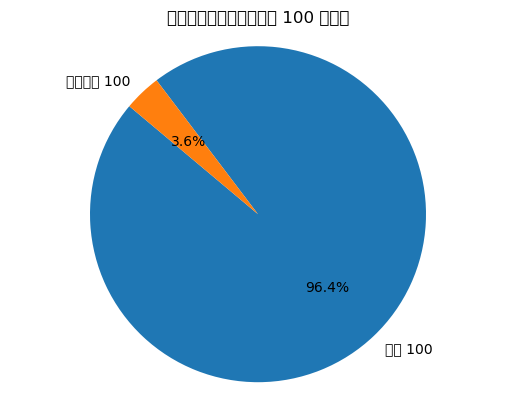

In [6]:
import matplotlib.pyplot as plt
from collections import Counter

# 假設這是你的字串陣列

# 計算每個字串的長度
lengths = [len(s) for s in data_list]

# 設定臨界長度
threshold = 100

# 計算大於和小於等於 threshold 的比例
greater_count = sum(1 for length in lengths if length > threshold)
less_equal_count = sum(1 for length in lengths if length <= threshold)

# 繪製圓餅圖
labels = [f'大於 {threshold}', f'小於等於 {threshold}']
sizes = [greater_count, less_equal_count]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # 確保圓餅圖是圓形
plt.title(f'序列長度大於和小於等於 {threshold} 的比例')
plt.show()

In [7]:
def slice_seq_to_same_length(datas: list, labels: list, length: int):
    train_data = []
    train_label = []
    test_data = []
    test_label = []

    for i in range(len(datas)):
        data = datas[i]
        label = labels[i]
        start = 0
        end = len(data)
        while end - start >= length:
            train_data.append(data[start:start + length])
            train_label.append(label[start:start + length])
            start += length
        if start != end:
            test_data.append(data[start:start + length])
            test_label.append(label[start:start + length])
    return np.array(train_data), np.array(train_label), np.array(test_data, dtype=object), np.array(test_label, dtype=object)


train_data, train_label, test_data, test_label = slice_seq_to_same_length(data_list, label_list, 100)

for data in train_data:
    assert len(data) == 100

train_data.shape, train_label.shape
    

((12021, 100, 5), (12021, 100))

In [8]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
from torch import nn

In [9]:



# 將數據轉換為 PyTorch 張量
train_data_tensor = torch.tensor(train_data, dtype=torch.float32)
train_label_tensor = torch.tensor(train_label, dtype=torch.float32)

# 建立 TensorDataset
dataset = TensorDataset(train_data_tensor, train_label_tensor)

# 設定訓練和驗證集的比例，例如 80% 給訓練集，20% 給驗證集
train_size = int(0.9 * len(dataset))
valid_size = len(dataset) - train_size

train_dataset, valid_dataset = random_split(dataset, [train_size, valid_size])

# 建立 DataLoader
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

# 檢查形狀
for batch_data, batch_labels in train_loader:
    print(f"Batch data shape: {batch_data.shape}, Batch labels shape: {batch_labels.shape}")
    break

Batch data shape: torch.Size([64, 100, 5]), Batch labels shape: torch.Size([64, 100])


In [10]:
# 將數據轉換為 PyTorch 張量列表，保留每個序列的不同長度
test_data_tensors = [torch.tensor(seq, dtype=torch.float32) for seq in test_data]
test_label_tensors = [torch.tensor(seq, dtype=torch.float32) for seq in test_label]

# 建立自定義 Dataset 用於處理不同長度的序列
class TestDataset(torch.utils.data.Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

# 建立 Test Dataset 和 DataLoader
test_dataset = TestDataset(test_data_tensors, test_label_tensors)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# 檢查測試資料加載情況
for data, label in test_loader:
    print(f"Data shape: {data[0].shape}, Label shape: {label[0].shape}")
    break

Data shape: torch.Size([52, 5]), Label shape: torch.Size([52])


C:\Users\weiso131\AppData\Local\Temp\ipykernel_26064\2696224944.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_data_tensors = [torch.tensor(seq, dtype=torch.float32) for seq in test_data]
C:\Users\weiso131\AppData\Local\Temp\ipykernel_26064\2696224944.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_label_tensors = [torch.tensor(seq, dtype=torch.float32) for seq in test_label]


In [34]:
class LSTMTagger(nn.Module):

    def __init__(self, hidden_dim, tagset_size, input_dim=5):
        super(LSTMTagger, self).__init__()
        self.hidden_dim = hidden_dim

        # LSTM層，輸入維度為 input_dim，輸出維度為 hidden_dim
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers=3, batch_first=True)

        # 線性層將 LSTM 的輸出映射到標籤空間
        self.linear = nn.Linear(hidden_dim, tagset_size)

    def init_hidden(self, batch_size):
        # 初始化隱藏狀態和細胞狀態
        return (torch.zeros(3, batch_size, self.hidden_dim),
                torch.zeros(3, batch_size, self.hidden_dim))

    def forward(self, sentence, hidden):
        # sentence 的形狀為 (batch_size, seq_len, input_dim)
        # LSTM 層的輸出 lstm_out 形狀為 (batch_size, seq_len, hidden_dim)
        # 並傳回更新後的隱藏狀態
        lstm_out, hidden = self.lstm(sentence, hidden)

        # 使用線性層將 LSTM 的輸出映射到標籤空間
        tag_space = self.linear(lstm_out)

        # tag_space 的形狀為 (batch_size, seq_len, tagset_size)
        return tag_space, hidden

In [37]:
import torch
import torch.optim as optim
import torch.nn as nn

# 設置 GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 定義訓練函數
def train_model(model, train_loader, valid_loader, num_epochs=10, learning_rate=0.001):
    # 將模型移到 GPU
    model = model.to(device, dtype=torch.float32)
    # 使用 Adam 優化器
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    # 定義損失函數
    criterion = nn.MSELoss()
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0

        for inputs, labels in train_loader:
            # 將輸入和標籤移到 GPU
            inputs, labels = inputs.to(device, dtype=torch.float32), labels.to(device, dtype=torch.float32)
            
            # 初始化隱藏狀態
            hidden = model.init_hidden(batch_size=inputs.size(0))
            hidden = tuple([h.to(device, dtype=torch.float32) for h in hidden])

            # 清零梯度
            optimizer.zero_grad()
            # 前向傳播
            outputs, _ = model(inputs, hidden)
            # 計算損失
            loss = criterion(outputs.squeeze(), labels)
            # 反向傳播
            loss.backward()
            # 更新參數
            optimizer.step()

            total_loss += loss.item()

        print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {total_loss / len(train_loader):.4f}")

        # 驗證模型
        valid_loss = validate_model(model, valid_loader, criterion)

# 定義驗證函數
def validate_model(model, valid_loader, criterion):
    model.eval()
    total_loss = 0.0
    error = 0
    with torch.no_grad():
        for inputs, labels in valid_loader:
            # 將輸入和標籤移到 GPU
            inputs, labels = inputs.to(device, dtype=torch.float32), labels.to(device, dtype=torch.float32)
            
            # 初始化隱藏狀態
            hidden = model.init_hidden(batch_size=inputs.size(0))
            hidden = tuple([h.to(device, dtype=torch.float32) for h in hidden])

            # 前向傳播
            outputs, _ = model(inputs, hidden)
            # 計算損失
            
            loss = criterion(outputs.squeeze(), labels)
            error += abs(outputs.view(-1) - labels.view(-1)).sum()
            total_loss += loss.item()

    print(f"Validation Loss: {total_loss / len(valid_loader):.4f}, valid error: {error}")
    return total_loss

# 定義測試函數
def test_model(model, test_loader):
    model.eval()
    predictions = []
    actuals = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            # 將輸入和標籤移到 GPU
            inputs, labels = inputs.to(device, dtype=torch.float32), labels.to(device, dtype=torch.float32)
            
            # 初始化隱藏狀態
            hidden = model.init_hidden(batch_size=inputs.size(0))
            hidden = tuple([h.to(device, dtype=torch.float32) for h in hidden])

            # 前向傳播
            outputs, _ = model(inputs, hidden)
            predictions.append(outputs.cpu().numpy())
            actuals.append(labels.cpu().numpy())

    return predictions, actuals


In [38]:
model = LSTMTagger(128, 1)
train_model(model, train_loader, valid_loader, 500)


Epoch [1/500], Training Loss: 305368.4078
Validation Loss: 287895.0789, valid error: 29020684.0
Epoch [2/500], Training Loss: 294141.6795
Validation Loss: 278162.4153, valid error: 28142190.0
Epoch [3/500], Training Loss: 284127.9766
Validation Loss: 269002.1883, valid error: 27175544.0
Epoch [4/500], Training Loss: 274526.8146
Validation Loss: 259954.7389, valid error: 25785948.0
Epoch [5/500], Training Loss: 265336.2850
Validation Loss: 251527.9544, valid error: 25096930.0
Epoch [6/500], Training Loss: 256619.8819
Validation Loss: 243509.8845, valid error: 24532542.0
Epoch [7/500], Training Loss: 248283.4917
Validation Loss: 235793.7418, valid error: 23902722.0
Epoch [8/500], Training Loss: 242000.7733
Validation Loss: 228464.4182, valid error: 23328820.0
Epoch [9/500], Training Loss: 232488.1081
Validation Loss: 221193.7426, valid error: 22957848.0
Epoch [10/500], Training Loss: 225007.7629
Validation Loss: 214173.2171, valid error: 22410406.0
Epoch [11/500], Training Loss: 217832.9

KeyboardInterrupt: 

In [40]:
criterion = nn.MSELoss()
validate_model(model, test_loader, criterion)

c:\Users\weiso131\anaconda3\envs\AI\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([1, 52])) that is different to the input size (torch.Size([52])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\weiso131\anaconda3\envs\AI\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([1, 18])) that is different to the input size (torch.Size([18])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\weiso131\anaconda3\envs\AI\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([1, 27])) that is different to the input size (torch.Size([27])). This will likely lead to incorrect results due to broadcasting. Please ensure they have

Validation Loss: 3153.9061, valid error: 820247.6875


6222656.732362235

In [42]:
data_num = 0
for i in range(len(test_data)):
    data_num += len(test_data[i])
data_num

88152